## Sentiment Analysis for American Airlines

## Table of Content

1. [Executive Summary](#cell_executivesummary)


2. [Data Exploration](#cell_exploration)


3. [Sentiment Analysis](#cell_sentiment)


4. [Topic Modeling](#cell_TopicModeling)


5. [Practical Implication](#cell_PracticalImplication)


<a id = "cell_executivesummary"></a>
### 1. Executive Summary


The use of social network data, particularly from platforms like Twitter, has seen significant growth in recent years as organizations aim to leverage this information for political campaigns, product and service quality improvements, and sentiment analysis. This report outlines the findings and implications of a comprehensive analysis conducted by Social Analytics, a company specializing in data gathering and deriving insights from social channels. The business problem at hand is to analyze customer tweets about airlines in America to gain valuable insights for decision-making.

The analytics method applied for analyzing the tweets about American airlines encompasses several key approaches to gain meaningful insights into customer sentiments.

-	Sentiment Classification: Tweets are classified into positive, negative, and neutral classes based on the sentiments they convey. Sentiment classification is crucial as it allows us to understand the overall sentiment distribution and customer perceptions towards different airlines. This classification provides valuable information for decision-makers to identify areas of improvement and capitalize on positive feedback.

-	To perform sentiment classification effectively, a variety of machine learning classifiers, such as Logistics Regression and Support Vector Machine, are evaluated. The accuracy, precision, recall, and F1 score are selected as the performance metrics to evaluate the machine learning classifiers. Accuracy provides an overall measure of classifier performance, while precision and recall give insights into the classifier's ability to correctly classify positive and negative tweets. F1 score is a harmonic mean of precision and recall, providing a balanced assessment of classifier effectiveness. By considering multiple performance metrics, the analysis ensures a holistic evaluation of the classifiers' performance.

-	Feature Extraction Techniques: To enhance sentiment analysis, the impact of feature extraction techniques, specifically CountVectorizer, is investigated. CountVectorizer is chosen because it efficiently transforms text data into numerical vectors based on word frequencies. This process allows machine learning algorithms to process textual data effectively.

-	In addition to machine learning classifiers, a lexicon-based sentiment analysis approach using Latent Dirichlet Allocation (LDA) is applied. LDA is a widely used topic modeling technique that identifies underlying topics in a corpus of text documents. In this context, LDA is utilized to uncover latent positive and negative sentiments expressed by customers. Comparing the proportions of positive and negative sentiments provides insights into the overall sentiment polarity associated with different airlines.

-	Last but not least, data and chart visualization is an essential aspect of the analytics approach. Box plots, bar charts, and line charts generated using the Matplotlib library help interpret the data and highlight significant insights from the dataset. Visualizations make it easier for stakeholders to grasp trends, patterns, and distributions in the data, enabling better decision-making and actionable insights.

Together with several analytics approaches were employed, and the following major findings were highlighted:

- Through data exploration, the airlines were ranked in terms of their popularity on Twitter (Question A). United emerged as the most popular, followed by US Airways, American, Southwest, Delta, and Virgin America. Furthermore, the analysis identified the most popular states for each airline's customers (Question B): New York is the most popular state for customers of both American and Delta airlines. Texas is the most popular state for Southwest, and Washington, D.C. is the most popular for US Airways. On the other hand, California is the most popular state for both United and Virgin America customers.
-	The report compared the performance of machine learning classifiers (Question C), specifically Logistics Regression and Support Vector Machine (SVM). The Logistics Regression model outperformed SVM, achieving an accuracy of 0.72 with Count Vectorizer feature extraction, while SVM achieved 0.71.
-	Lexicon-Based Sentiment Analysis, using Latent Dirichlet Allocation (LDA), sentiment analysis revealed that American Airlines and United Airlines received more positive sentiments from customers, while US Airways received more negative sentiments (Question D).
-	Topic modelling identified nine negative sentiment topics that customers frequently encountered when dealing with airlines (Question E). They are: Customer Services, Waiting and Customer Support, Ticket Booking Issues, Baggage and Luggage Problems, Gate Agents and Ground Services, Time and Phone Support, Flight Delays,  Reservation Issues, and Experience of airport service problem. These topics can help airlines identify common pain points and improve services to enhance customer satisfaction.
Based on the insights obtained from the analysis, several practical implications and strategies were suggested to enhance customer satisfaction, build brand loyalty, and gain a competitive edge in the market:
1.	Customer Engagement Strategy: Develop a comprehensive plan to engage with customers on social media platforms, addressing their queries and concerns promptly.
2.	Region-Specific Marketing: Tailor marketing campaigns and services based on the preferences and needs of customers in specific regions.
3.	Predict Sentiments with Machine Learning for Proactive Support: Utilize machine learning algorithms to predict customer sentiments and offer proactive support before issues escalate.
4.	Address Commonly Mentioned Issues to Improve Customer Satisfaction: Address the topics identified in the analysis that commonly lead to negative sentiments among customers.
5.	Proactive Crisis Management: Implement strategies to handle potential crises swiftly and effectively, maintaining a positive brand image.
6.	Employee Training and Recognition for Outstanding Customer Support: Invest in training employees to provide exceptional customer support, and recognize and reward outstanding performance.
7.	Competitor Analysis for Differentiation: Conduct competitive analysis to identify areas where the airline can stand out from competitors.

In conclusion, the analysis conducted by Social Analytics provides valuable insights into customer sentiments about airlines on Twitter. By understanding these sentiments and implementing the suggested strategies, airlines can enhance customer satisfaction, strengthen brand loyalty, and gain a competitive advantage in the market.


<a id = "cell_exploration"></a>
### 2. Data Exploration

Loading dataset


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
#import dataset
df = pd.read_csv('A1 Data Set.csv')
#check the number of columns and rows in the dataset
print('Number of records read: ', df.shape)
df.head()

Number of records read:  (14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Finding column types
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
# Identification of missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending=False)

negativereason_gold          14608
airline_sentiment_gold       14600
tweet_coord                  13621
negativereason                5462
user_timezone                 4820
tweet_location                4733
negativereason_confidence     4118
dtype: int64

After checking the missing values, it is noted that there were 6/15 attributes having missing values. Especially, the top 3 missing values are 'negativereason_gold', 'airline_sentiment_gold', and 'tweet_coord' with more than 93%, which had no impact nor meaning for the overall analysis, so they should be removed from the dataset.

In [ ]:
# Drop columns with lots of missing values then show statistics about each column.
df.drop(['negativereason_gold', 'airline_sentiment_gold', 'tweet_coord'], axis=1, inplace=True)
df.describe(include='all')

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
count,1.464000e+04,14640,14640.000000,9178,10522.000000,14640,14640,14640.000000,14640,14640,9907,9820
unique,NaN,3,NaN,10,NaN,6,7701,NaN,14427,14247,3081,85
top,NaN,negative,NaN,Customer Service Issue,NaN,United,JetBlueNews,NaN,@united thanks,2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,NaN,9178,NaN,2910,NaN,3822,63,NaN,6,5,157,3744
mean,5.692184e+17,NaN,0.900169,NaN,0.638298,NaN,NaN,0.082650,NaN,NaN,NaN,NaN
std,7.791112e+14,NaN,0.162830,NaN,0.330440,NaN,NaN,0.745778,NaN,NaN,NaN,NaN
min,5.675883e+17,NaN,0.335000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,5.685592e+17,NaN,0.692300,NaN,0.360600,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
50%,5.694779e+17,NaN,1.000000,NaN,0.670600,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
75%,5.698905e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN


From the provided data summary, we can notice the following insights for further analysis:

- The dataset contains a total of 14,640 rows or entries.

- 'airline_sentiment' has 3 unique values: 'negative', 'neutral', and 'positive', representing the sentiment of the tweet.

- The mean confidence level for 'airline_sentiment_confidence' is approximately 0.9, indicating high confidence in the sentiment classification. The standard deviation is approximately 0.16, indicating moderate variance in the confidence levels. The minimum and maximum values for 'airline_sentiment_confidence' are approximately 0.335 and 1.0, respectively.

- 'negativereason' has 10 unique values, representing the reasons for negative sentiment. The most common negative reason is 'Customer Service Issue' with a frequency of 2,910 occurrences.

- 'airline' has 6 unique values, representing the names of the airlines.

- 'name' has 7,701 unique values, indicating the names of the users who posted the tweets => there are some names posted more than 1 text content.

- The most retweeted tweet has been retweeted 44 times.

- The "tweet_location" column contains 9,907 non-null values out of 14,640 total rows. This means that around 4,733 rows have missing or NaN values for the "tweet_location" column. There are 7,701 unique values in the "tweet_location" column. This indicates that the tweets in the dataset come from various locations, and there is a diverse range of locations represented in the data.

                   tweet_id
airline_sentiment          
negative               9178
neutral                3099
positive               2363


Text(0, 0.5, 'Count')

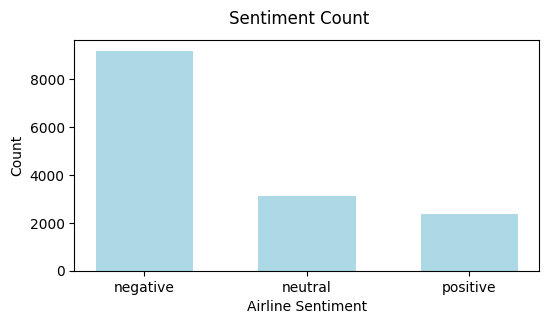

In [ ]:
# Airline Sentiment and confidence score check
from matplotlib import pyplot as pyplot

#Count reviews by sentiment categories
SentimentCount = df.groupby('airline_sentiment').count()[['tweet_id']]
print(SentimentCount)

pyplot.figure(figsize=(6, 3))
pyplot.bar(SentimentCount.index.values,SentimentCount['tweet_id'], color='lightblue', width=0.6)
pyplot.suptitle('Sentiment Count')
pyplot.xlabel('Airline Sentiment')
pyplot.ylabel('Count')

The most frequent 'airline sentiment' in the dataset is 'negative' with a frequency of 9,178 occurrences, followed by neutral with 3,099 occurrences and positive with 2,363 frequencies.


Let's discover level of confidence for each sentiment type of these tweets!

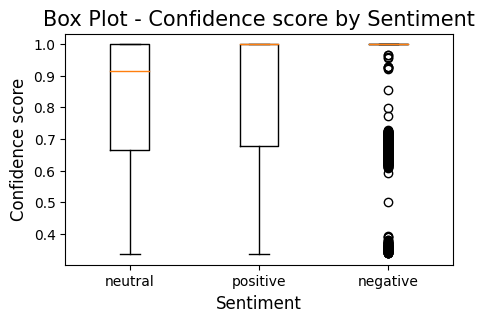

In [ ]:
#Get sentiments - not including null (nan) value.
AirlineSentiment = df[~df['airline_sentiment'].isnull()]['airline_sentiment'].unique()

#Construct a list of confidence score data for sentiments
ConfidenceScore = []
for i in range(len(AirlineSentiment)):
    ConfidenceScore.append(df.loc[df['airline_sentiment'] == AirlineSentiment[i]]['airline_sentiment_confidence'])

#Create a new figure
pyplot.figure(figsize=(5,3))
pyplot.title('Box Plot - Confidence score by Sentiment', fontsize=15)
pyplot.xlabel('Sentiment', fontsize=12)
pyplot.ylabel('Confidence score', fontsize=12)
pyplot.boxplot(ConfidenceScore, labels = AirlineSentiment);

As can be seen from the box plot chart:
- negative sentiment confidence score is mostly distributed at 1.0 (~75%), showing that those tweets are very highly reliable.
- neutral and postive sentiment both have a pattern of left skewed  with the median score is 0.9 and 1.0 respectively, indicating that more than 50% of the tweets of these 2 types are also highly trusted.  

How about the confidence level of negative reasons of sentiment?

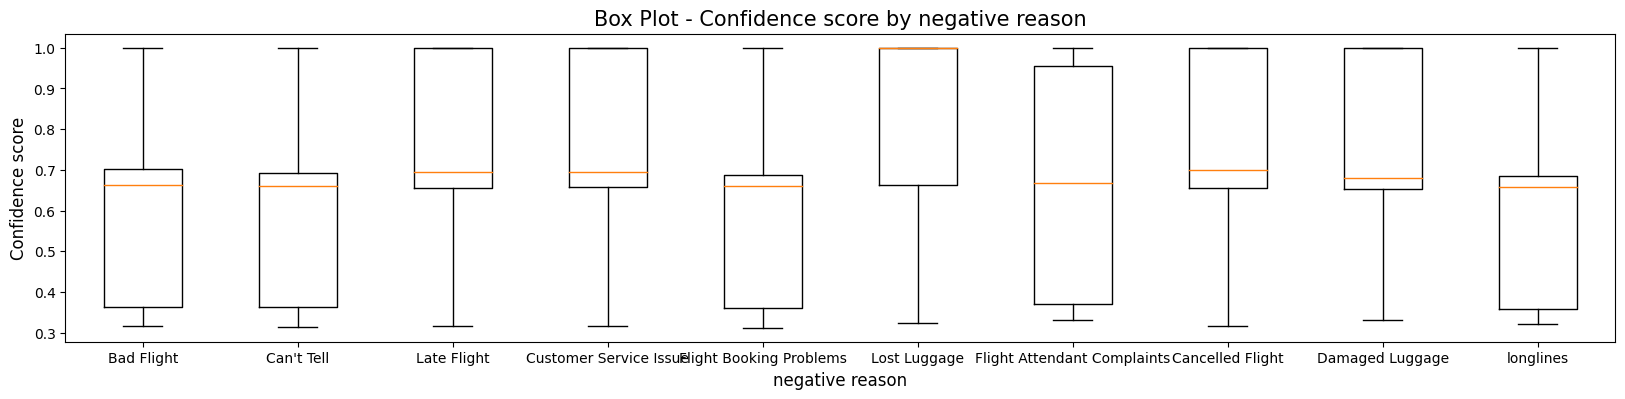

In [ ]:
#Get negative reason - not including null (nan) value.
NegativeReason = df[~df['negativereason'].isnull()]['negativereason'].unique()

#Construct a list of confidence score data for sentiments
ConfidenceScore2 = []
for i in range(len(NegativeReason)):
    ConfidenceScore2.append(df.loc[df['negativereason'] == NegativeReason[i]]['negativereason_confidence'])

#Create a new figure
pyplot.figure(figsize=(20,4))
pyplot.title('Box Plot - Confidence score by negative reason', fontsize=15)
pyplot.xlabel('negative reason', fontsize=12)
pyplot.ylabel('Confidence score', fontsize=12)
pyplot.boxplot(ConfidenceScore2, labels = NegativeReason);

With the box plot visualization, we can compare the median line of confidence score and the interquartile ranges to examine how the data is disperse for each negative reason.
- "Bad flight", "can't tell", "booking problems" and "longlines" share the left skewed pattern and have the similar interquartile range from approximately 0.36 to around 0.7 with a median line at about 0.68, indicating 50% of the tweet having a high trust at 0.68 and above while only 25% of tweets are above 0.7 score of confidience.
- "Late flight", "customer service", "cancelled flight", "damaged luggage" share the right skewed pattern and similar interquatile ranges from around 0.68 to 1, indicating that there are around 75% of tweets are distributed across this range, showing highly trusted of these reason comparing to the above mentioned reasons ("Bad flight", "can't tell", "booking problems" and "longlines")
- It is noticeable that the median line of "lost luggage" is at 1.0, meaning more than 50% of the tweets are completely trusted.
- "Flight Attendant Complaints" stood out among other reasons as the box plot length range is the largest range (from 0.37 to 0.95) and has a symmetric shappe, implying the more dispersion of data comparing to other reasons.    

**Question A**: Rank the popularity of airlines based on the number of tweets posted for each airline.



In order to rank the popularity of airlines based on the tweets, we need to handle duplicates of the tweets by removing the duplicated 'text' tweets which had the same 'name'.

          airline  tweet_count
4          United         3822
3      US Airways         2911
0        American         2604
2       Southwest         2419
1           Delta         2222
5  Virgin America          504


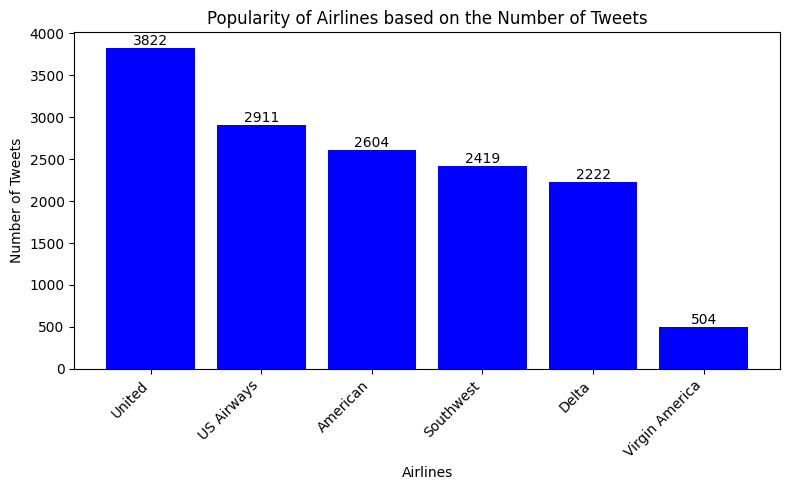

In [ ]:
# Combine values from 'name' and 'text' to remove duplicates tweets
df['new_column'] = df['name'].astype(str) + '_' + df['text'].astype(str)
df['new_column'] = df['new_column'].drop_duplicates(keep='first')

# Step 1: Group the data by 'airline' and count the number of tweets for each airline
airline_tweet_count = df.groupby('airline')['new_column'].count().reset_index(name='tweet_count')

# Step 2: Sort the data in descending order based on tweet counts
sorted_airlines = airline_tweet_count.sort_values(by='tweet_count', ascending=False)

# Step 3: Display the ranked popularity of airlines
print(sorted_airlines)

# Step 4: Create a bar chart to visualize the ranked popularity of airlines
plt.figure(figsize=(8, 5))
bars = plt.bar(sorted_airlines['airline'], sorted_airlines['tweet_count'], color='blue')
#Add labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height),
             ha='center', va='bottom')
plt.xlabel('Airlines')
plt.ylabel('Number of Tweets')
plt.title('Popularity of Airlines based on the Number of Tweets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


After removing the duplicate tweets (which have the same '**text**' contents and tweeted by the same '**name**'), the airlines can be ranked in terms of popularity on Twitter with United being the most popular, followed by US Airways, American, Southwest, Delta, and Virgin America being the least popular in terms of the number of tweets posted about them:

1. United: 3822 tweets
2. US Airways: 2911 tweets
3. American: 2604 tweets
4. Southwest: 2419 tweet
5. Delta: 2222 tweets
6. Virgin America: 504 tweets

**Question B**: Identify the most popular states where customers are located for each airline.

For this question, we utilize the new dataset (df1) after removing the handling duplicates of tweets content. The approach is to count the largest number of state occurence contained in 'tweet_location' by each 'name'.  

In [ ]:
# create new df with drop duplicates in 'new_column' (removing duplicate tweets)
df1 = df.drop_duplicates(subset='new_column')

# Remove 'name' duplicates for further count the most popular states
df1['name'] = df1['name'].drop_duplicates(keep='first')

# Preprocess the tweet location information to extract state abbreviations
df1['state'] = df1['tweet_location'].str.extract(r'([A-Z]{2})')

# Drop tweets with missing or invalid location information
df1_cleaned = df1.dropna(subset=['state'])

# Group the data by 'airline' and 'state' and count the number of tweets for each combination
state_tweet_count = df1_cleaned.groupby(['airline', 'state'])['name'].count().reset_index(name='tweet_count')

# For each airline, find the state with the highest tweet count
most_popular_states_per_airline = state_tweet_count.groupby('airline').apply(lambda x: x.loc[x['tweet_count'].idxmax()])

# Display the most popular states for each airline
print(most_popular_states_per_airline.drop('airline', axis=1))

               state  tweet_count
airline                          
American          NY           49
Delta             NY          110
Southwest         TX           62
US Airways        DC           52
United            CA           82
Virgin America    CA           40


<ipython-input-33-bf6bd0723719>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['name'] = df1['name'].drop_duplicates(keep='first')
<ipython-input-33-bf6bd0723719>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['state'] = df1['tweet_location'].str.extract(r'([A-Z]{2})')


We can identify the most popular states where customers are located for each airline, based on the tweet_locations contents which must include states

1. American: The most popular state for customers of the airline "American" is New York (NY), with 49 tweets.

2. Delta: The most popular state for customers of the airline "Delta" is also New York (NY), with 110 tweets.

3. Southwest: The most popular state for customers of the airline "Southwest" is Texas (TX), with 62 tweets.

4. US Airways: The most popular state for customers of the airline "US Airways" is Washington, D.C. (DC), with 52 tweets.

5. United: The most popular state for customers of the airline "United" is California (CA), with 82 tweets.

6. Virgin America: The most popular state for customers of the airline "Virgin America" is California (CA), with 40 tweets.

With such approach to count the states by each airline, New York is the most popular state for customers of both American and Delta airlines. Texas is the most popular state for Southwest, and Washington, D.C. is the most popular for US Airways. Finally, California is the most popular state for both United and Virgin America customers.

<a id = "cell_sentiment"></a>
### 3. Sentiment Analysis

 **Machine Learning Based Approach**

**Question C:** Is it possible to predict tweet’s sentiments using machine learning approach based on the provided raw data set?

Answer: Yes, it is possible to predict sentiments using ML approach. To perform sentiment analysis on tweets using a machine learning approach, we can typically follow these steps:

1. Data Preprocessing: Preprocess the raw tweets to clean and transform the text data.

2. Labeling Sentiments: Assign sentiment labels to each tweet in the dataset. For example, you can use a binary sentiment classification where tweets are labeled as either positive or negative sentiments. Alternatively, you could use more granular sentiment labels such as positive, negative, neutral, or even sentiment scores.

3. Feature Extraction: Convert the preprocessed text data into numerical features that machine learning algorithms can understand. Common approaches for this step include using techniques like Bag-of-Words (BoW)

4. Split Data: Split the dataset into a training set and a test set. The training set is used to train the machine learning model, and the test set is used to evaluate its performance.

5. Model Selection and Training: Choose a suitable machine learning model for sentiment analysis. Train the selected model using the training data.

6. Model Evaluation: Evaluate the performance of the trained model using the test set. Common evaluation metrics for sentiment analysis include accuracy, precision, recall, F1-score, and Cohen's Kappa score.

7. Prediction: Once the model is trained and evaluated, it can be used to predict the sentiments of new, unseen tweets.

DATA PREPROCESSING

Before apply ML based sentiment analysis, we need to conduct a text pre_processing steps. Let's break down the text preprocessing steps one by one:

1. Remove URLs:
The first step is to remove any URLs present in the text. It replaces any sequence of characters starting with "http://" or "www." and followed by non-whitespace characters with an empty string, effectively removing the URLs from the text.

2. Remove Non-Alphabetic Characters:
The second step is to remove any characters that are not alphabetic letters. It replaces any character that is not an uppercase or lowercase letter with a space.

3. Convert to Lowercase:
The third step is to convert all the text to lowercase. This step ensures that the text is case-insensitive and avoids treating the same word with different cases as different words.

4. Tokenization:
The fourth step is tokenization, where the text is split into individual words. The code splits the text into words based on whitespace.

5. Remove Stop Words
The fifth step involves removing stop words and applying stemming. Stop words are common words like "the," "and," "is," etc., which do not carry significant meaning in the context of the analysis.

6. Apply stemming:
It applies stemming using the Porter stemming algorithm. Stemming reduces words to their root form, so variations of the same word can be treated as the same word.

7. Remove the First Word of Airline:
The last preprocessing step appears to be specific to the context of the analysis. It removes the first word from the tokenized text if the length of the token list is greater than one. This is useful in this case where the first word is redundant or not relevant for the analysis.

8. The cleaned and preprocessed review is reconstructed by joining the preprocessed tokens back into a string and stored in the variable document.

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
porter = PorterStemmer()

documents = df1['text']
Cleaned_doc = []

#Apply text-preprocessing
for r in range(len(documents)):
    review = documents.iloc[r]
    try:
        # remove URLs
        review = re.sub(r'http\S+|www\S+', '', review)
        # removing everything except alphabets
        review = re.sub('[^A-Za-z]', ' ', review)
        # make all text lowercase
        review = review.lower()
        # apply tokenization
        Tokens = review.split()
        # Remove Stop Words and apply stemming operation
        each_item = []
        for t in Tokens:
            if t not in stop_words:
                each_item.append(porter.stem(t))
        # Remove the first word of airline
        if len(each_item) > 1:
            each_item = each_item[1:]
        cleaned_review = ' '.join(each_item)
    except:
        continue
    #Save cleaned text
    Cleaned_doc.append(cleaned_review)
    print('-[Review Text]: ', cleaned_review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Streaming output truncated to the last 5000 lines.
-[Review Text]:  reach hardwork mom tri best
-[Review Text]:  great oper guy run mechan issu tape piec plane togeth lol
-[Review Text]:  thank idea resolv like purchas ticket
-[Review Text]:  hi attach aa ff lxa reserv e kvm thansk
-[Review Text]:  check onlin state statu close mean yet abl reach live person
-[Review Text]:  system affect weather
-[Review Text]:  call abl get reschedul thank quick respons today
-[Review Text]:  get aa frequent flyer number appear usair reserv frustrat
-[Review Text]:  unabl check flight bo dca heard flight cancel flight reschedul updat
-[Review Text]:  americanair forget without custom would busi epicfail usairwaysfail
-[Review Text]:  hi guy flight still time site app check thank
-[Review Text]:  americanair hey sinc f ed wknd day pass admir club meal coupon free coke blank stare
-[Review Text]:  make reserv make excus usairwaysfail
-[Review Text]:  list baggag claim number call number ticket use ladi

Apply 2 machine learning models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

# Convert the list of Cleaned_doc to a DataFrame
new_df = pd.DataFrame({'Cleaned_doc': Cleaned_doc})

# Merge the DataFrames on their index
merged_df = pd.merge(df1, new_df, left_index=True, right_index=True)

cv = CountVectorizer()

text_counts = cv.fit_transform(merged_df['Cleaned_doc'])
print('Bag of Word Matrix size: ', text_counts.shape)

X_train, X_test, y_train, y_test = train_test_split(text_counts, merged_df['airline_sentiment'], test_size=0.3, random_state=1)

# Model Generation Using Logistics Regression
clf_lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
predicted= clf_lr.predict(X_test)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    kappa_score = cohen_kappa_score(y_test, y_pred)
    return accuracy, precision, recall, f1, kappa_score

lr_accuracy, lr_precision, lr_recall, lr_f1, lr_kappa = evaluate_model(clf_lr, X_test, y_test)

print("\nLogistics Regression Performance:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-score:", lr_f1)
print("Cohen's Kappa Score:", lr_kappa)

# Model Generation Using Support Vector Machine
clf_svm = SVC(kernel='linear', C=0.5, random_state=1)
clf_svm.fit(X_train, y_train)
predicted= clf_svm.predict(X_test)

svm_accuracy, svm_precision, svm_recall, svm_f1, svm_kappa = evaluate_model(clf_svm, X_test, y_test)

print("\nSupport Vector Machine (SVM) Performance:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)
print("Cohen's Kappa Score:", svm_kappa)

Bag of Word Matrix size:  (14328, 9057)

Logistics Regression Performance:
Accuracy: 0.7183065829262619
Precision: 0.7033124812631211
Recall: 0.7183065829262619
F1-score: 0.705419703937065
Cohen's Kappa Score: 0.4401007285234012

Support Vector Machine (SVM) Performance:
Accuracy: 0.7096999302163294
Precision: 0.6962393248473975
Recall: 0.7096999302163294
F1-score: 0.6998270313187401
Cohen's Kappa Score: 0.432991478626498


Based on these metrics, we can observe the following comparisons:

- **Accuracy:** Accuracy measures the overall correctness of the predictions. The Logistic Regression model slightly outperforms the SVM model in terms of accuracy (0.7183 vs. 0.7097).

- **Precision:** The Logistic Regression model has a slightly higher precision compared to the SVM model (0.7033 vs. 0.6962). Precision measures the proportion of true positive predictions among all positive predictions. Higher precision indicates fewer false positives.

- **Recall:** Both models have the same recall score (0.7183), which measures the proportion of true positive predictions among all actual positive instances. It seems both models are equally good at capturing positive instances.

- **F1-score**: The F1-score of the Logistic Regression model is slightly higher than the SVM model (0.7054 vs. 0.6998). F1-score is the harmonic mean of precision and recall and is useful when there is an uneven class distribution.

- **Cohen's Kappa Score:** The Logistic Regression model has a higher Cohen's Kappa score compared to the SVM model (0.4401 vs. 0.4330). Cohen's Kappa measures the agreement between the predicted and actual classes, considering the agreement that could occur by chance. Higher Kappa scores indicate better agreement between predictions and true labels.

Overall, based on these metrics, the Logistic Regression model appears to have a slightly better performance than the Support Vector Machine (SVM) model in this particular scenario. However, the differences in performance between the two models are relatively small, and the choice of the best model may depend on other factors such as computational complexity, interpretability, and other specific requirements of the application. Though the accuracy, precision, recall, F1-score is quite good (~70%) The 2 models need further investigation and improve the Kappa score, considering the following steps:
- Address class imbalance by using techniques like oversampling, undersampling, or using class weights during training.
- Collect more data to reduce the impact of limited data.
- Review class definitions and consider refining them if there is ambiguity or overlap.
- Validate the data to ensure it is clean and free from noise or mislabeled samples.

**Lexicon Based Approach**

**Question D**: Apply lexicon-based sentiment analysis to the tweets and then compare the proportions of positive and negative sentiments expressed by customers toward the top 3 airlines with most tweets. Among them, which airlines received more positive sentiments than negative sentiments from customers?

Similar to ML approach, there are several steps should be applied in data preprocessing step before applying lexicon based analysis to help improve the performance of the model.

Let's break down the text preprocessing steps one by one:

1. Remove URLs:
The first step is to remove any URLs present in the text. It replaces any sequence of characters starting with "http://" or "www." and followed by non-whitespace characters with an empty string, effectively removing the URLs from the text.

2. Remove Non-Alphabetic Characters:
The second step is to remove any characters that are not alphabetic letters. It replaces any character that is not an uppercase or lowercase letter with a space.

3. Convert to Lowercase:
The third step is to convert all the text to lowercase. This step ensures that the text is case-insensitive and avoids treating the same word with different cases as different words.

4. Remove extra white space: The purpose of this step is to ensure that the text is free of unnecessary whitespace characters, which might have resulted from previous text processing steps or could have been present in the original data. It can be particularly useful for this case where extra whitespace may cause issues in downstream tasks that rely on clean and consistent input data.

5. Remove the First Word of Airline:
The last preprocessing step appears to be specific to the context of the analysis. It removes the first word from the tokenized text if the length of the token list is greater than one. This is useful in this case where the first word is redundant or not relevant for the analysis.

6. The cleaned and preprocessed review is reconstructed by joining the preprocessed tokens back into a string and stored in the variable document.

In [ ]:
#Apply text-preprocessing
documents = df1['text']
new_cleaned_doc = []

for r in range(len(documents)):
    review = documents.iloc[r]
    try:
        # remove URLs
        review = re.sub(r'http\S+|www\S+', '', review)
        # removing everything except alphabets
        review = re.sub('[^A-Za-z]', ' ', review)
        # make all text lowercase
        review = review.lower()
        # Remove extra white spaces
        review = ' '.join(review.split())
        # Remove the first word
        review = ' '.join(review.split()[1:])
    except:
        continue
    #Save cleaned text
    new_cleaned_doc.append(review)
    print('-[Review Text]: ', review)

Streaming output truncated to the last 5000 lines.
-[Review Text]:  another twist in the plot took off from miami then had to return due to a unsecured cargo door most stressful vacation ever
-[Review Text]:  she will be reaching out to you hardworking mom just trying to do her best
-[Review Text]:  great operation you guys are running more mechanical issues and now taping piece of plane together lol
-[Review Text]:  thanks any idea when it will be resolved i d like to purchase my ticket
-[Review Text]:  hi can you attach my aa ff lxa to reservation e kvm thansk
-[Review Text]:  when i check online it states status closed what does this mean as i have yet been able to reach a live person
-[Review Text]:  your system is affected by the weather
-[Review Text]:  we called and were able to get rescheduled thank you for the quick responses today
-[Review Text]:  how do you get your aa frequent flyer number to appear in a usair reservation frustrating
-[Review Text]:  i m unable to check in 

Apply lexicon based sentiment analysis model

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-37-3c9641692385>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3_airlines['sentiment_label'] = top_3_airlines['new_cleaned_doc'].apply(get_sentiment_label)


sentiment_label  negative  neutral  positive  total_tweets  \
airline                                                      
American              967      464      1018          2449   
US Airways           1233      547      1131          2911   
United               1437      706      1679          3822   

sentiment_label  positive_proportion  negative_proportion  
airline                                                    
American                    0.512846             0.487154  
US Airways                  0.478426             0.521574  
United                      0.538832             0.461168  


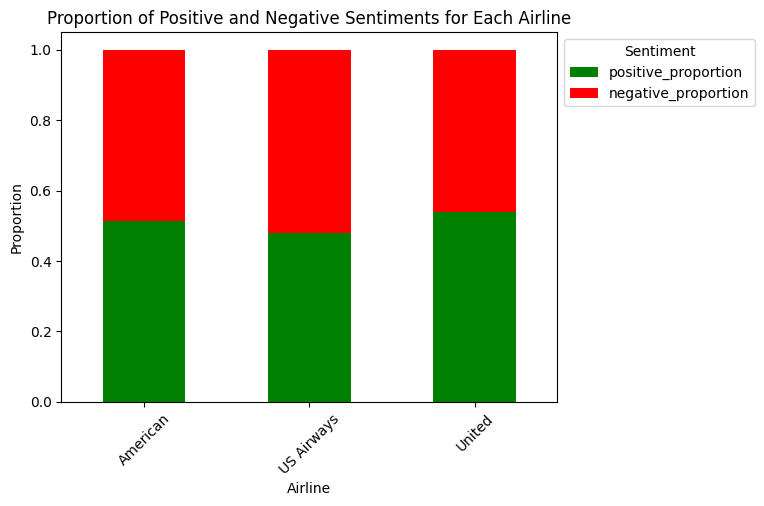

In [ ]:
from matplotlib import pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Download required resources
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')

# Convert the list of new_cleaned_doc to a DataFrame
lex_df = pd.DataFrame({'new_cleaned_doc': new_cleaned_doc})

# Merge the DataFrames on their index
new_merged_df = pd.merge(df1, lex_df, left_index=True, right_index=True)


# Filter the dataset to include only the top 3 airlines with the most tweets
top_airlines = new_merged_df['airline'].value_counts().nlargest(3).index.tolist()
top_3_airlines = new_merged_df[new_merged_df['airline'].isin(top_airlines)]

# Initialize the VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Perform lexicon-based sentiment analysis and compute the proportions of positive and negative tweets
def get_sentiment_label(text):
    sentiment_score = analyzer.polarity_scores(text)['compound']
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'

top_3_airlines['sentiment_label'] = top_3_airlines['new_cleaned_doc'].apply(get_sentiment_label)

# Compute the proportions of positive and negative tweets for each of the top 3 airlines
proportions = top_3_airlines.groupby(['airline', 'sentiment_label']).size().unstack(fill_value=0)
proportions['total_tweets'] = proportions.sum(axis=1)
proportions['positive_proportion'] = proportions['positive'] / (proportions['positive'] + proportions['negative'])
proportions['negative_proportion'] = proportions['negative'] / (proportions['positive'] + proportions['negative'])


# Compare the proportions of positive vs. negative tweets to identify the airlines with more positive sentiments
print(proportions)

# Create a bar chart to visualize the proportions of positive and negative sentiments for each airline
proportions[['positive_proportion', 'negative_proportion']].plot(kind='bar', stacked=True, color=['green','red'])
plt.xlabel('Airline')
plt.ylabel('Proportion')
plt.title('Proportion of Positive and Negative Sentiments for Each Airline')
plt.legend(title='Sentiment', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

Based on the lexicon-based sentiment analysis, we can conclude:

- American Airlines: Received more positive sentiments (51.28%) than negative sentiments (48.71%) from customers.
- US Airways: Received more negative sentiments (52.16%) than positive sentiments (47.84%) from customers.
- United Airlines: Received more positive sentiments (53.88%) than negative sentiments (46.12%) from customers.

Therefore, to answer question D, American Airlines and United Airlines received more positive sentiments than negative sentiments from customers, while US Airways received more negative sentiments than positive sentiments.

<a id = "cell_TopicModeling"></a>
### 4. Topic Modeling

**Question E:** What are the commonly mentioned issues that customers feel negative about the airlines?


For Text Preprocessing, we apply following steps:

1. Remove URLs: It replaces any sequence of characters starting with "http://" or "www." and followed by non-whitespace characters with an empty string, effectively removing the URLs from the text.

2. Remove Non-Alphabetic Characters: It replaces any character that is not an uppercase or lowercase letter with a space.

3. Convert to Lowercase: This step ensures that all the text is in lowercase, making it case-insensitive and avoiding treating the same word with different cases as different words.

4. Tokenization: The text is split into individual words using whitespace as the separator.

5. Remove Stop Words: Stop words, which are common words like "the," "and," "is," etc., are removed from the tokenized list of words.

6. Remove Short Words: The code removes short words. It only keeps words with a length greater than 3 characters to keep only meaningful words.

7. POS Tagging (Part-of-Speech Tagging): The script uses Natural Language Toolkit (NLTK) to perform Part-of-Speech (POS) tagging on the filtered words. POS tagging identifies the grammatical parts of speech (e.g., nouns, verbs, adjectives) of each word in the text.

8. Select Nouns Only: The code filters out only the words that are identified as nouns based on their POS tags. It keeps only the words with tags starting with 'NN' (which stand for nouns). This step aims to focus on the nouns in the text, which are typically the most informative for certain text analysis tasks.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
import re  #Regular expression operation package
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

nltk.download('averaged_perceptron_tagger')  # Download POS tagger
from nltk import pos_tag

#Filter the dataset to include only the negative tweets
negative_tweets_df = df1[df1['airline_sentiment'] == 'negative']

documents = negative_tweets_df['text']
TM_cleaned_doc = []

#Apply text-preprocessing
for r in range(len(documents)):
    review = documents.iloc[r]
    try:
        # Remove URLs
        review = re.sub(r'http\S+|www\S+', '', review)
        # removing everything except alphabets
        review = re.sub('[^A-Za-z]', ' ', review)
        # make all text lowercase
        review = review.lower()
        # apply tokenization
        Tokens = review.split()
        # Remove Stop Words
        each_item = []
        for t in Tokens:
            if t not in stop_words:
                each_item.append(t)
        # removing short words
        Filtered_token = [w for w in each_item if len(w)>3]
        review = ' '.join(Filtered_token)
        # POS tagging
        tagged_tokens = pos_tag(nltk.word_tokenize(review))
        nouns = [word for word, pos in tagged_tokens if pos.startswith('NN')]
        review = ' '.join(nouns)
    except:
        continue
    # Save cleaned text
    TM_cleaned_doc.append(review)
    print('-[Review Text]: ', review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Streaming output truncated to the last 5000 lines.
-[Review Text]:  please fleet fleek
-[Review Text]:  jetblue plane directtv issues yesterday system crew member
-[Review Text]:  jetblue bunch time
-[Review Text]:  jetblue plane afford miss flight boston
-[Review Text]:  sorry jetblue
-[Review Text]:  jetblue vegas plane thanks flight
-[Review Text]:  case confirmation fleek fleet fleek
-[Review Text]:  jetblue fights
-[Review Text]:  jetblue jetblue fleet fleek
-[Review Text]:  brands shit stop jetblue fleet fleek
-[Review Text]:  shits stop jetblue fleet fleek
-[Review Text]:  jetbae jetblue fleet fleek
-[Review Text]:  hate jetblue fleet fleek
-[Review Text]:  fleet fleek
-[Review Text]:  jetblue fleet fleek
-[Review Text]:  madness fleet fleek
-[Review Text]:  jetblue thewayoftheid travel vouchers indignation
-[Review Text]:  jetblue respond complaints appropriation spirit airlines list
-[Review Text]:  jetblue flight catch vegas flight
-[Review Text]:  jetblue customer support re

Term Document and Visualize the most 40 common words in the negative tweets

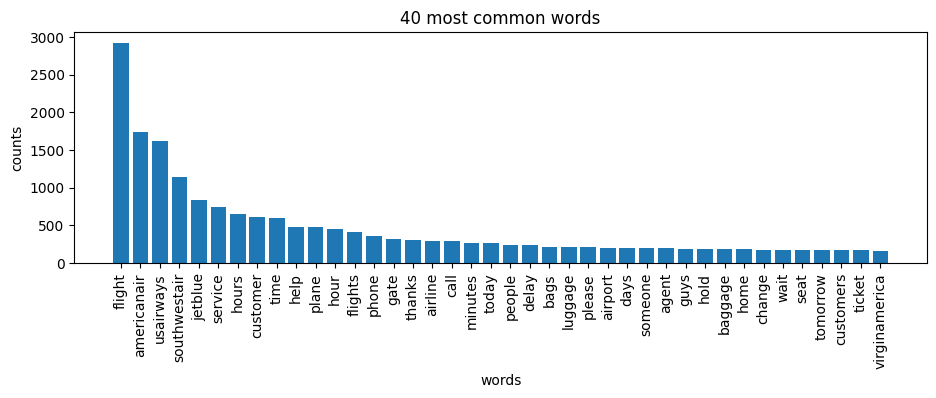

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

count_vectorizer = CountVectorizer()# Fit and transform the processed titles

count_data = count_vectorizer.fit_transform(TM_cleaned_doc)
count_data
terms = count_vectorizer.get_feature_names_out()

# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]

count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:40] #Take the top 40 words

words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))

plt.figure(2, figsize=(11, 3))
plt.subplot(title='40 most common words')
plt.bar(words, counts)

plt.xticks(x_pos, words, rotation=90)
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

Term Selection

The highly frequent words such as "flight", "airline name" does not carry any value to help with topic discovery, as most reviews would contain these words. Such highly frequently word should be discarded. In addition, infrequrent words that appear a few times in the entire data set should be discarded as well, because they carry little value.

In [ ]:
# Remove a list of words of airlines name still remained in the tweets
words_to_remove = ['americanair', 'usairways', 'southwestair', 'jetblue','virginamerica', 'united', 'delta']

# Remove highly frequent (Greater than 25%) and infrequent words (less than 1%)
keepIndex = []
for t in range(len(total_counts)):
    if total_counts[t] < 750 and total_counts[t] > 30 and terms[t] not in words_to_remove:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

# Save the remaining term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:, keepIndex]
ReducedCount

Number of Terms Remained:  186


<9082x186 sparse matrix of type '<class 'numpy.int64'>'
	with 19859 stored elements in Compressed Sparse Row format>

Selecting Topic Number

In order to have a reference number of topic, we can evaluate the quality of topic models by masuring by topic coherence score. In general, a better model would prdouce a higher score. We can explore with gensim, which can be used to construct LDA models and evaluate model quality with coherence score.(https://radimrehurek.com/gensim/models/ldamodel.html)

[(0,
  '0.110*"tomorrow" + 0.080*"agent" + 0.067*"gate" + 0.061*"wait" + '
  '0.060*"travel" + 0.051*"book" + 0.038*"delays" + 0.037*"rebook" + '
  '0.029*"issue" + 0.028*"options"'),
 (1,
  '0.195*"service" + 0.147*"help" + 0.141*"customer" + 0.059*"bags" + '
  '0.053*"luggage" + 0.047*"reservation" + 0.043*"system" + 0.034*"online" + '
  '0.023*"change" + 0.020*"line"'),
 (2,
  '0.119*"someone" + 0.098*"home" + 0.086*"please" + 0.066*"nothing" + '
  '0.042*"refund" + 0.041*"credit" + 0.034*"money" + 0.028*"problem" + '
  '0.024*"member" + 0.024*"hours"'),
 (3,
  '0.108*"guys" + 0.096*"seat" + 0.067*"ticket" + 0.064*"minutes" + '
  '0.052*"staff" + 0.047*"airlines" + 0.041*"reservations" + 0.040*"dallas" + '
  '0.033*"point" + 0.032*"tomorrow"'),
 (4,
  '0.088*"work" + 0.063*"baggage" + 0.054*"food" + 0.054*"experience" + '
  '0.052*"person" + 0.044*"issues" + 0.037*"wife" + 0.037*"everyone" + '
  '0.035*"family" + 0.034*"time"'),
 (5,
  '0.107*"hold" + 0.092*"days" + 0.089*"hour" + 0


Coherence Score:  0.37714043696416427


Topic Number: 1 -- Coherence: 0.1998935869326624


Topic Number: 2 -- Coherence: 0.17014582650275661


Topic Number: 3 -- Coherence: 0.18927591607982808


Topic Number: 4 -- Coherence: 0.23259919418752203


Topic Number: 5 -- Coherence: 0.2796696180913194


Topic Number: 6 -- Coherence: 0.29661542522858514


Topic Number: 7 -- Coherence: 0.34651645708646883


Topic Number: 8 -- Coherence: 0.35151646916113755


Topic Number: 9 -- Coherence: 0.36528574342713555


Topic Number: 10 -- Coherence: 0.39456089728840266
Topic Number: 11 -- Coherence: 0.38440132151357853


Text(0, 0.5, 'Coherence')

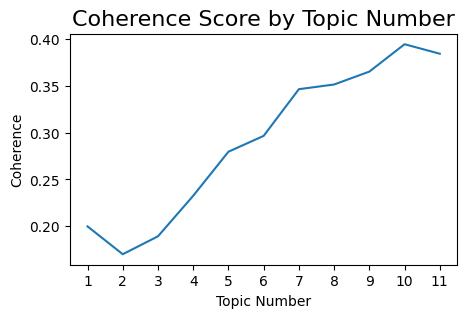

In [ ]:
import gensim
from gensim.models.ldamodel import LdaModel
from pprint import pprint#

Cleaned_doc_new = []

for r in range(len(TM_cleaned_doc)):
    each_item = []
    for t in TM_cleaned_doc[r].split():
        #Keep only terms included in ReducedTerm
        if t in ReducedTerm:
             each_item.append(t)
    Cleaned_doc_new.append(each_item)


import gensim.corpora as corpora

# Construct term dictionary in the format "Term : Index"
id2word = corpora.Dictionary(Cleaned_doc_new)


#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in Cleaned_doc_new]


#Train model using bag of word reprentation
lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                       id2word=id2word,
                                       num_topics=12,
                                       random_state=100)

#Print the Keyword in the 12 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[Corpus]

from gensim.models import CoherenceModel

# Compute Coherence Score. Note: that CoherenceModel require
# text input format (Cleaned_doc_new) instead of bag of word
coherence_model_lda = CoherenceModel(model=lda_model,
                                     texts=Cleaned_doc_new,
                                     dictionary=id2word,
                                     coherence='c_v')


coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

#Evaluation models with topics numbers from 1 to 12
Topics = list(range(1,12,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                               id2word=id2word,
                                               num_topics=top,
                                               random_state=100)
    #Keep the trained models
    Trained_Models.append(lda_model)
    #Compute coherence score for each model
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=Cleaned_doc_new,
                                         dictionary=id2word,
                                         coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    #Save and print the coherence scores
    coherence_scores.append(coherence)
    print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

plt.figure(figsize=(5,3))
plt.plot(coherence_scores)
plt.xticks(range(0,len(Topics)),Topics)
plt.title('Coherence Score by Topic Number', fontsize=16)
plt.xlabel('Topic Number')
plt.ylabel('Coherence')

LDA Modeling
After several iteration of making sense of the choosing number of topics ranges from 7 to 12 topics (referring to the coherance score above), it is best to interpret the results with 9 topics. Therefore, we train an LDA model with 9 topics:

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Tweak the two parameters below
number_topics = 9

lda = LDA(n_components=number_topics, n_jobs=-1, random_state=2023)
lda.fit(ReducedCount)
#Trained LDA model
lda.components_

array([[0.11112005, 0.11112803, 0.11113443, ..., 0.11113199, 0.11113313,
        0.11112931],
       [0.11112704, 0.11891837, 0.11111978, ..., 0.11112535, 0.11111753,
        0.11113854],
       [0.11112483, 0.11112421, 0.11112624, ..., 0.11113318, 0.11112678,
        0.11113853],
       ...,
       [0.11112217, 0.11112459, 0.11111874, ..., 0.11112199, 0.11112141,
        0.11112388],
       [0.1111254 , 0.11118452, 0.11112608, ..., 0.11114275, 0.11112742,
        0.11112958],
       [0.11113437, 0.11112417, 0.11112592, ..., 0.11112265, 0.1111266 ,
        0.11112908]])

Extract and view the top words in each topic:

In [ ]:
#Word Probablities in Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))


Topic #0:
service : 0.242
customer : 0.198
people : 0.079
guys : 0.063
thanks : 0.050
airport : 0.047
problems : 0.041
connection : 0.034
nothing : 0.032
airlines : 0.031

Topic #1:
hours : 0.319
hold : 0.092
online : 0.043
refund : 0.035
info : 0.032
tonight : 0.029
reason : 0.028
status : 0.026
wifi : 0.026
hope : 0.025

Topic #2:
flights : 0.172
today : 0.096
call : 0.082
customers : 0.070
ticket : 0.070
staff : 0.055
please : 0.055
passengers : 0.054
delays : 0.043
board : 0.027

Topic #3:
hour : 0.141
bags : 0.099
luggage : 0.095
baggage : 0.082
email : 0.046
business : 0.041
night : 0.041
yesterday : 0.038
week : 0.037
claim : 0.034

Topic #4:
gate : 0.170
someone : 0.105
agent : 0.104
seats : 0.079
agents : 0.072
morning : 0.049
times : 0.041
ground : 0.032
site : 0.031
contact : 0.027

Topic #5:
time : 0.192
help : 0.157
phone : 0.119
home : 0.059
tomorrow : 0.041
wait : 0.038
miles : 0.037
anyone : 0.034
book : 0.032
call : 0.029

Topic #6:
plane : 0.219
delay : 0.108
days : 

Visualize the word clouds for the topics generated by LDA

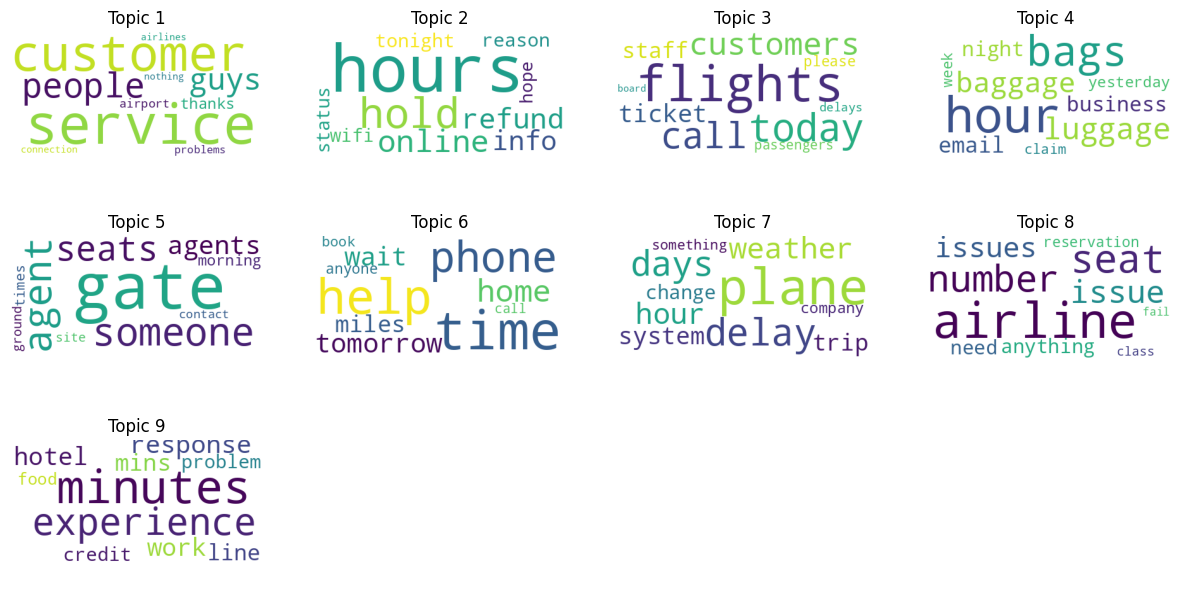

In [ ]:
!pip install wordcloud

from wordcloud import WordCloud
import math
rows = math.ceil(len(Word_Topics_Pro)/4)
fig, ax = plt.subplots(rows, 4, figsize=(15,2.5*rows))

if rows == 1:
    ax = ax.reshape(1, -1)
elif ax.ndim == 1:
    ax = ax.reshape(-1, 1)

[axi.set_axis_off() for axi in ax.ravel()]
for topic_idx, topic in enumerate(Word_Topics_Pro):
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
    # convert to dictionary type - keep top 10 words
    Word_Frequency = dict(count_dict[0:10])
    # generate word cloud
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)
    # visualize word cloud in figure
    subfig_Row = math.floor(topic_idx/4)
    subfig_Col = math.ceil(topic_idx%4)
    ax[subfig_Row,subfig_Col].imshow(wordcloud)
    ax[subfig_Row,subfig_Col].set_title("Topic {}".format(topic_idx+1))
plt.show()

Based on the wordcloud, we can interpret the negative sentiment of each topic as follows:

**Topic #1: Customer Services**

Customers are expressing negative sentiments related to "service" and "customer" indicating dissatisfaction with the airline's customer service.
The presence of "thanks" in this topic might suggest sarcastic or insincere gratitude due to poor service.
"Problems" may indicate issues faced by customers when dealing with the airline.
"Nothing" might suggest problems or challenges experienced at the airport which may not be supported.

**Topic #2: Waiting and Customer Support**

Customers are expressing frustration related to "hours" and "hold" indicating long wait times and hold durations.
"Online", "refund", "wifi", "info" and "status" may suggest dissatisfaction with online services, refund processes, wifi connection and a lack of information about flight status.
The presence of "hope" in this topic might imply a lack of hope for a resolution or assistance.

**Topic #3: Ticket Booking Issues**

Negative sentiments are associated with "flights", "today", "call" and "ticket" indicating dissatisfaction with bookings and customer interactions.
"Customers" and "staff" might indicate unsatisfactory experiences with airline personnel.

**Topic #4: Baggage and Luggage Problems**

Customers are expressing frustration related to "hour," "bags," "luggage," and "baggage," indicating dissatisfaction with baggage handling or lost luggage.
"Email" and "business" might indicate issues experienced while traveling for business and communication via email.

**Topic #5: Gate Agents and Ground Services**

The most significant negative sentiment is related to "gate", "agent" and "ground" possibly indicating unsatisfactory experiences with gate agents and ground services.
"Morning" and "times" might suggest issues with the morning time operations.

**Topic #6: Time and Phone Support**

Negative sentiments are associated with "time," "phone," "wait," and "call," indicating dissatisfaction with response times and customer support over the phone.
"Home," "miles," "anyone," and "book" might be related to issues with difficulties reaching anyone for assistance from distance or from home.

**Topic #7: Flight Delays**

There is frustration related to "plane," "delay," "days," and "weather," suggesting dissatisfaction with flight delays or cancelled caused by weather conditions.
"Hour," "trip," and "change" could indicate delays impacting travel plans and time-sensitive trips.

**Topic #8: Reservation Issues**

Negative sentiments are associated with "airline," "seat," "number," "issue," and "issues," suggesting general complaints about the airline and specific reservation problems.
"Anything," "need," "fail," and "class" might indicate a lack of assistance and concerns relating to change the seat class.

**Topic #9: Experience of airport service problems**

Customers are expressing dissatisfaction with "minutes" "experience" "response", "line" and "work" suggesting issues with response times and service experiences or indicating long line of queue at check-in.
"Hotel" "problem" "credit" and "food" may be related to problems with hotel services within/near the airport and credit transactions, as well as issues with food during the flight.

Overall, the topics represent various negative sentiments and issues that customers may encounter when dealing with the airline. These topics can provide valuable insights for the airline to identify common pain points and improve their services to enhance customer satisfaction.

Computer the popularity of topics over the entire data set and visulize the topic distribution

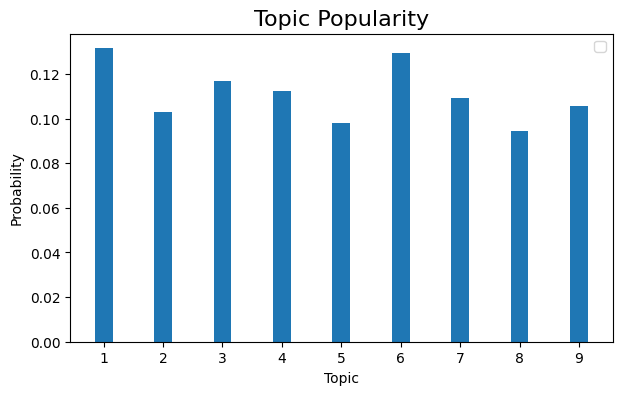

In [ ]:
#Compute topic distribution for each document
TopicDis_Doc = lda.transform(ReducedCount)

#Compute overall topic distribution for all each documents
Overall_Topic_Dis = sum(TopicDis_Doc)/sum(sum(TopicDis_Doc))
Overall_Topic_Dis

# Get the topic index
Bar_index = np.asarray(range(1,number_topics+1))

#Visualize topic distributions of review groups
plt.figure(figsize=(7,4))
plt.title('Topic Popularity', fontsize=16)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.bar(Bar_index, Overall_Topic_Dis.tolist(), 0.3)
plt.xticks(Bar_index, Bar_index)
plt.legend()
plt.show();

From the analysis, we can observe the following:

- The document set is likely to cover diverse topics, as the probabilities for different topics are relatively evenly distributed. No single topic dominates the document set significantly.

- Topic 1 (customer service), and topic 6 (time and phone support) have relatively higher probabilities compared to other topics, indicating that they are more prevalent in the documents.

- Topic 5 (gate agent and ground services) and topic 8 (reservation issues) have the lowest probability among all topics, indicating they are the least prevalent in the documents.

The analysis gives an overview of the main topics present in the document set and their respective proportions. Further exploration and examination of the individual documents under each topic can provide deeper insights into the specific themes and sentiments expressed by customers in the dataset.

Topic Probabilities by Document Group

Business managers are often interested in idendifying topics, which are frequrently mentioned by specific groups of reviewers. We can compute the probablity distribution with respect to document groups by normalizing the probablities of topics over multiple documents in a group.

In this case, we group by airline to help each airline to improve the customer services by defining which their customer's concerns were.

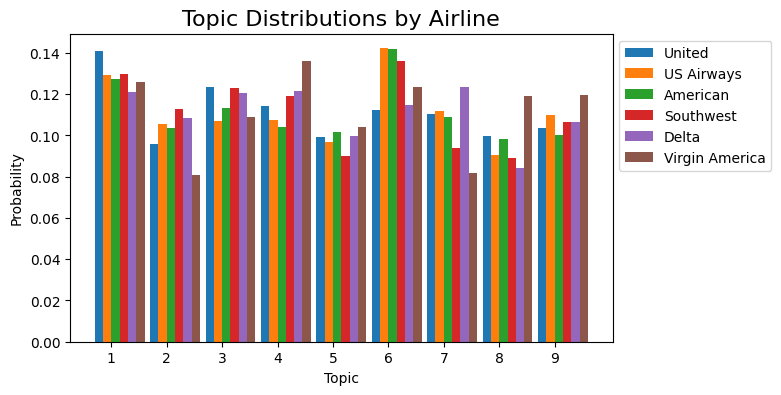

In [ ]:
import numpy as np
from matplotlib import pyplot as pyplot
All_Airlines = ['United', 'US Airways', 'American', 'Southwest', 'Delta', 'Virgin America']

Group_Prob = []
for i in range(len(All_Airlines)):
    ReducedTerm_Selected = ReducedCount[np.where(negative_tweets_df['airline'] == All_Airlines[i])]
    TopicDis_Doc = lda.transform(ReducedTerm_Selected)
    Group_Prob.append(sum(TopicDis_Doc)/sum(sum(TopicDis_Doc)))


#Create a new figure
pyplot.figure(figsize=(7,4))
pyplot.title('Topic Distributions by Airline', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')

width = 0.15
for i in range(len(All_Airlines)):
    pyplot.bar(Bar_index + i*width, Group_Prob[i].tolist(), width,  label=All_Airlines[i])

pyplot.xticks(Bar_index + 1.5*width, Bar_index)
pyplot.legend(loc='upper left', bbox_to_anchor=(1, 1))
pyplot.show();

Based on the topic distribution of each airline, we can analyze the prevalence of different topics in the tweets for each airline:

**1. United:**

Topic 1 (customer service) and Topic 3 (ticket issues) are the most prevalent topics, indicating that negative sentiments related to "service" and "customer experience" are significant for United airlines.

**2. US Airways:**

Topic 6 (Time and phone support) is the most prevalent topic for US Airways, which indicates issues with response times and customer support over the phones.
Topic 1 (customer service) also has relatively high probabilities, similar to United airline.

**3. American:**

Topic 6 (Time and phone support) is the most prevalent for American airlines as well", while and Topic 8 (Reservation issues) is the least common comparing with other airlines.

**4. Southwest:**

Topic 6 (time and phone support) is again the most prevalent for Southwest airlines, suggesting significant problems with "holding time" on phone service
Similar to United and US Airways Topic 1 (customer service) are also relatively prominent, indicating concerns about "customer experience" "service".

**5. Delta:**

Topic 7 (Flight delays) also is the most prevalent found in Delta airline comparing to other airline.
Topic 1 (customer service), Topic 3 (ticket issues), and Topic 4 (Baggage and Luggage problems) also have relatively high probability for Delta airlines, indicating issues with "baggage", "luggage" and "claim".

**6. Virgin America:**

Topic 4 (Baggage and Luggage problems) is the most prevalent for Virgin America, while topic 2 (waiting and customer support) and topic 7 (flight delays) are the least common comparing to others.

Overall, Topic 6 (time and phone support) seems to be a common issue across multiple airlines, while Topic 1 (customer experience) and Topic 9 (airline services) are also frequent topics of concern. Understanding these prevalent topics can help airlines address specific pain points and improve their services accordingly. Additionally, analyzing the sentiment associated with each topic can provide further insights into customer feedback and satisfaction.

<a id = "cell_Practicalimplication"></a>
### 5. Practical Implication

Based on the insights obtained from analysis, businesses can gain valuable information about how customers perceive their services. Here are some practical recommendations for businesses to better support customers:

**Customer Engagement Strategy:**

Based on the popularity ranking of airlines from the tweet volume (Question A), businesses should focus on strengthening their social media presence, especially for the bottom-ranked airline (Virgin America). For all airlines, by engaging with customers on social media platforms, responding to their queries and concerns, and providing real-time support can improve customer satisfaction and brand perception.

**Region-Specific Marketing:**

Analyzing the most popular states for each airline (Question B) allows businesses to customize their marketing efforts for specific regions. For instance, New York is the most popular state for customers of both American and Delta airlines, while California is the most popular state for both United and Virgin America customers, these airlines can offer targeted promotions, services, and experiences that resonate with customers in different geographical areas.

**Predict Sentiments with Machine Learning for Proactive Support:**

Utilizing machine learning models (Question C) to predict tweet sentiments can provide real-time insights into customer perceptions. Businesses can proactively identify potential issues and respond swiftly to negative sentiments, minimizing the impact of negative feedback and turning it into a positive customer experience. For instance, issues of "ticket booking" business can take prompt action to help customers right away to improve customer satisfaction.

**Address Commonly Mentioned Issues to Improve Customer Satisfaction:**

By analyzing negative sentiments and identifying commonly mentioned issues with topic modelling, airlines can prioritize and address the most pressing concerns such as time and phone support, custoemr service. Implementing targeted solutions to these issues can lead to increased customer satisfaction, loyalty, and positive word-of-mouth.

**Proactive Crisis Management:**

Regularly monitoring sentiment helps businesses identify potential crises before they escalate. By being proactive in addressing negative feedback and concerns, airlines can safeguard their brand reputation and demonstrate their commitment to customer satisfaction.

**Employee Training and Recognition for Outstanding Customer Support:**

Recognizing and appreciating employees who receive positive sentiments from customers can boost employee morale and motivation. Implementing programs of training for ground service or gate agents to enhance customer support skills can further improve the overall customer experience.

**Competitor Analysis for Differentiation:**

 By analyzing sentiment data for competitors, airlines can gain insights into their strengths and weaknesses. Understanding competitor sentiment can help businesses identify areas where they can differentiate themselves, capitalize on competitors' shortcomings, and offer unique value propositions.

By incorporating these practical implications into their customer support and marketing strategies, businesses can enhance customer satisfaction, build brand loyalty, and maintain a competitive edge in the market. Regularly monitoring sentiments, analyzing customer feedback, and adopting a customer-centric approach will contribute to long-term success and growth.








### References:

- Machinelearningplus. Topic Modeling with Gensim (Python), https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/